In [40]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [49]:
import pandas as pd
import numpy as np
import datetime
import umap
import warnings
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')

# vectorisation
Use a python script here. Not working within notebook.
- create a scispacy virual environment 
``` bash
conda create scispacy
conda activate scispacy
pip install scispacy pandas numpy
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.3/en_core_sci_sm-0.2.3.tar.gz
```
- and run
```bash 
python PUBMED_CORD_04B_SciSpaCy_vectorise.py
```

## read in data

In [49]:
dataset = 'all'
df = pd.read_csv('data/{}.csv'.format(dataset), dtype=str)
df.shape

2020-03-27 14:51:41.002792  -----  Reading in data for  all


(922633, 30)

# Dimensional reduction for visualisation

In [42]:
X = np.load('data/scispacy_{}.npy'.format(dataset), allow_pickle=True)
X.shape

(895270, 200)

# pre-uMap
This is a fast way to shrink our dataset to make it more manageable for Umap

In [43]:
%%time
# pick an intermediate dimensionality to start off dimensional reduction, then let uMap do the rest

X_reduced = TruncatedSVD(n_components = 50,
                            random_state = 0).fit_transform(X)
X_reduced.shape

Wall time: 8.25 s


(895270, 50)

# uMap

In [44]:
trans = umap.UMAP(
#                 n_neighbors=5,
#                   min_dist=0.1,
#                   metric='correlation'
                 ).fit(X_reduced)

In [45]:
trans.embedding_.shape

(895270, 2)

In [46]:
colours = ['green' if x == '0' else 'red' for x in df['covid']]

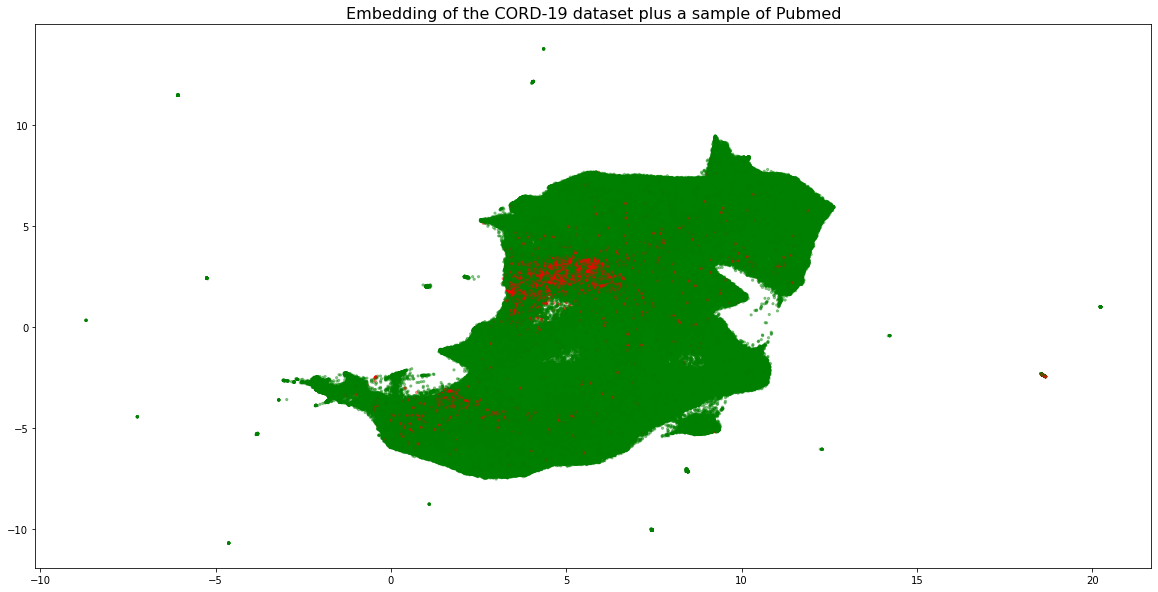

In [47]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(trans.embedding_[:,0], 
            trans.embedding_[:,1], 
            s= 5, 
            c=colours, 
            cmap='Spectral',
           alpha = 0.4)
plt.title('Embedding of the CORD-19 dataset plus a sample of Pubmed', fontsize=16);
plt.savefig('output/{}_plt.png'.format(dataset))

In [48]:
np.save('data/2d_scispacy_s2_pubmed_{}_corpus.npy'.format(dataset),trans.embedding_)